In [170]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

import os
import sys
import pandas as pd
import pickle
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [171]:
np.set_printoptions(precision=3)

## Methods 

In [175]:
from interpret_utils import Mode
from interpret_utils import analyze_trace
from interpret_utils import compute_metrics
from interpret_utils import print_result
from interpret_utils import summary_result

## Interpret trace

In [243]:
print_result("adaptive_sv_system/test/FS7_ENR1_QUE7/")

FS7_ENR1_QUE7
[base/adapt          ]: 0.0795(err), 0.1005(fpr), 0.0586(fnr)
[base/test           ]: 0.0808(err), 0.1030(fpr), 0.0586(fnr) 0.1823(s_err)
[base/ood            ]: 0.0800(err), 0.0800(fpr), 0.0000(fnr) 0.0000(s_err)
--------------------------------------------------------------------------------
[inc/adapt           ]: 0.0512(err), 0.0696(fpr), 0.0328(fnr)
[inc/test            ]: 0.0493(err), 0.0682(fpr), 0.0304(fnr) 0.0162(s_err)
[inc/ood             ]: 0.0530(err), 0.0530(fpr), 0.0000(fnr) 0.0052(s_err)
--------------------------------------------------------------------------------
[inc_neg/adapt       ]: 0.0458(err), 0.0556(fpr), 0.0359(fnr)
[inc_neg/test        ]: 0.0440(err), 0.0523(fpr), 0.0358(fnr) 0.0176(s_err)
[inc_neg/ood         ]: 0.0498(err), 0.0498(fpr), 0.0000(fnr) 0.0049(s_err)
--------------------------------------------------------------------------------


In [237]:
1.0 == 1

True

In [253]:
result_dir = "adaptive_sv_system/trial_results/enr306_closedset_big/"
settings = os.listdir(result_dir)

results = []
mode_set = set()
for setting in settings:
    modes, summary = summary_result(result_dir+setting)
    results += summary
    mode_set.update(modes)

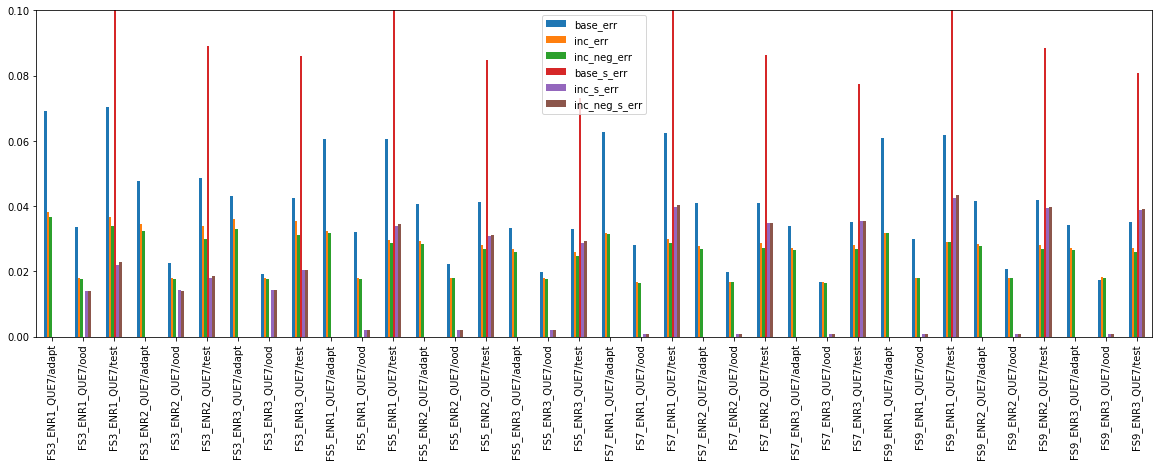

In [254]:
summary_df = pd.DataFrame.from_records(results, columns=['setting', 'trial_type', 'base_err', 'inc_err', 'inc_neg_err', 'base_s_err', 'inc_s_err', 'inc_neg_s_err'])
summary_df.index = summary_df.apply(lambda x: '/'.join([x.setting, x.trial_type]), axis=1)
summary_df = summary_df.sort_index()
summary_df.plot.bar(figsize=(20,6), ylim=[0, 0.1])

In [252]:
summary_df

,setting,trial_type,base_err,inc_err,inc_neg_err,base_s_err,inc_s_err,inc_neg_s_err
FS3_ENR1_QUE7/adapt,FS3_ENR1_QUE7,adapt,0.076712,0.049170,0.039066,0.000000,0.000000,0.000000
FS3_ENR1_QUE7/ood,FS3_ENR1_QUE7,ood,0.076271,0.053391,0.051407,0.000000,0.039638,0.037641
FS3_ENR1_QUE7/test,FS3_ENR1_QUE7,test,0.077078,0.049470,0.034874,0.082355,0.016371,0.017010
FS3_ENR2_QUE7/adapt,FS3_ENR2_QUE7,adapt,0.054325,0.046099,0.035245,0.000000,0.000000,0.000000
FS3_ENR2_QUE7/ood,FS3_ENR2_QUE7,ood,0.057118,0.053312,0.051603,0.000000,0.040080,0.038321
FS3_ENR2_QUE7/test,FS3_ENR2_QUE7,test,0.057024,0.047136,0.031107,0.064328,0.012474,0.013007
FS3_ENR3_QUE7/adapt,FS3_ENR3_QUE7,adapt,0.049129,0.046832,0.035607,0.000000,0.000000,0.000000
FS3_ENR3_QUE7/ood,FS3_ENR3_QUE7,ood,0.049601,0.053393,0.051505,0.000000,0.040107,0.038502
FS3_ENR3_QUE7/test,FS3_ENR3_QUE7,test,0.050217,0.048167,0.031590,0.060118,0.015493,0.015344
FS5_ENR1_QUE7/adapt,FS5_ENR1_QUE7,adapt,0.066125,0.040320,0.034752,0.000000,0.000000,0.000000


## Gathering information after proceeding verifications

trace = [adapt_tr, test_tr, ood_tr]  
tr = trial_idxs, scores, label, pred 또는   
tr = trial_idxs, scores, label, pred, enroll_pred  

In [51]:
keys = np.array(pickle.load(open("xvector_embeds/sv_keys.pkl", "rb")))

In [439]:
def get_info_trace(trace):
    if len(trace) == 4:
        idxs, _, label, pred, = trace
    elif len(trace) == 5:
        idxs, _, label, pred, _ = trace
    ids = [keys[int(idx)] for idx in idxs]
    data = pd.DataFrame({"id":ids, "idx":idxs, "pred":pred, "label":label}, dtype=np.int64)

    return data

In [454]:
trace = pickle.load(open("./adaptive_sv_system/test/inc_neg/Set3_Enr5_Que7/trace.pkl", "rb"))
meta_info = pd.read_pickle("./adaptive_sv_system/test/inc_neg/Set3_Enr5_Que7/meta_info_df.pkl")

In [463]:
enr_idx = meta_info.iloc[0].enr_idxs
np.save("enroll_idx.npy", enr_idx)

In [457]:
adapt_data, test_data, ood_data = list(map(get_info_trace, trace[0]))
adapt_data.to_csv("adapt_data.csv", index=None)
test_data.to_csv("test_data.csv", index=None)
ood_data.to_csv("ood_data.csv", index=None)

### Sanity Check
meta info와 trace의 순서가 잘 일치하는지 체크

In [217]:
trial = pickle.load(open("trials/enr306_closedset/3/trials.pkl", "rb"))

In [44]:
meta_info = pd.read_pickle("adaptive_sv_system/test/FS3_ENR1_QUE7/base/meta_info_df.pkl")

In [45]:
meta_info

,enr_idxs,enr_spks,n_trials,ood_s_err,test_s_err
0,[60505],id10539,"(536, 136, 92)",1,0.500000
1,[40839],id10376,"(366, 92, 88)",1,0.282609
2,[80702],id10715,"(592, 150, 72)",1,0.453333
3,[6427],id10052,"(320, 82, 116)",1,0.341463
4,[55158],id10497,"(288, 74, 82)",1,0.391892
5,[89569],id10787,"(400, 102, 102)",1,0.490196
6,[113544],id10982,"(464, 116, 150)",1,0.500000
7,[13385],id10107,"(458, 116, 88)",1,0.500000
8,[53916],id10484,"(352, 88, 64)",1,0.500000
9,[1780],id10017,"(238, 60, 64)",1,0.500000
